In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

/opt/intel/intelpython3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

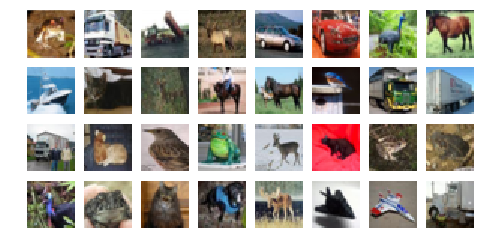

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [6]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

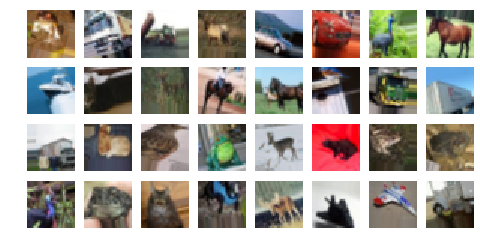

In [7]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int

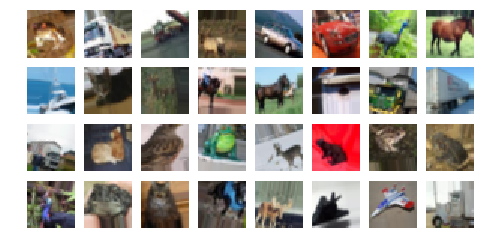

In [9]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

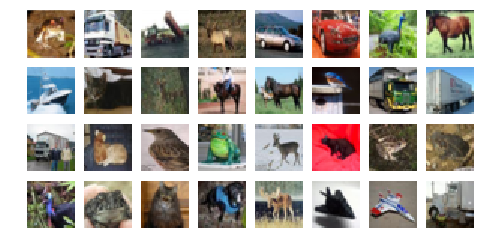

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [5]:
Aug_generator =ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

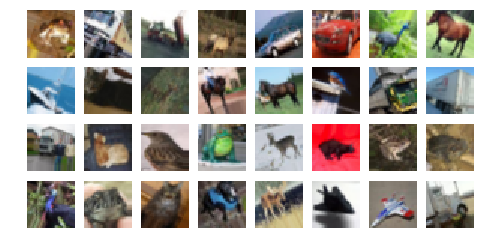

In [6]:
augmented_iamges = next(Aug_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

In [7]:
Aug_generator_1 =ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True
)

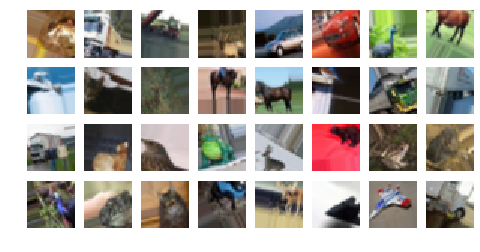

In [8]:
augmented_iamges_1 = next(Aug_generator_1.flow(images, shuffle=False))
img_combine(augmented_iamges_1.astype("int"))

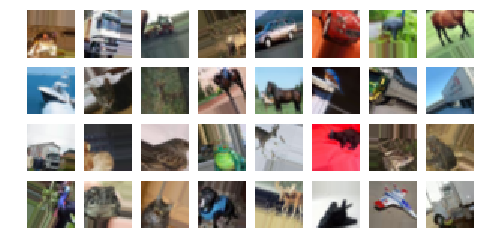

In [9]:
augmented_iamges_1 = next(Aug_generator_1.flow(images, shuffle=False))
img_combine(augmented_iamges_1.astype("int"))

In [10]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [12]:
x_train_1 = x_train.astype('float32')
x_train_1 /= 255

In [13]:
import copy
images_1=copy.deepcopy(x_train_1)

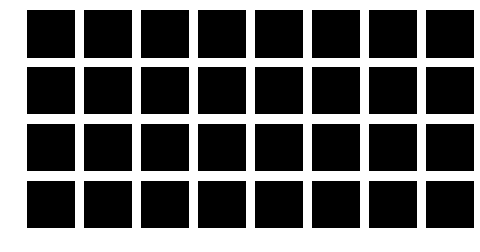

In [14]:
augmented_iamges = next(Aug_generator.flow(images_1, shuffle=False))
img_combine(augmented_iamges.astype("int"))

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import os

batch_size = 128 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

In [17]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [18]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

In [20]:
x_test_1 = x_test.astype('float32')
x_test_1 /= 255

In [21]:
history = model.fit_generator(Aug_generator.flow(images_1,y_train),
                              steps_per_epoch=int(len(images_1)/batch_size),
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test_1, y_test))


Epoch 1/10
390/390 [==============================] - 81s 208ms/step - loss: 2.0137 - accuracy: 0.2572 - val_loss: 1.8034 - val_accuracy: 0.3665
Epoch 2/10
390/390 [==============================] - 81s 207ms/step - loss: 1.7043 - accuracy: 0.3845 - val_loss: 1.4204 - val_accuracy: 0.4691
Epoch 3/10
390/390 [==============================] - 82s 211ms/step - loss: 1.5850 - accuracy: 0.4248 - val_loss: 1.4132 - val_accuracy: 0.4963
Epoch 4/10
390/390 [==============================] - 82s 210ms/step - loss: 1.5288 - accuracy: 0.4495 - val_loss: 1.3112 - val_accuracy: 0.5166
Epoch 5/10
390/390 [==============================] - 84s 217ms/step - loss: 1.4383 - accuracy: 0.4831 - val_loss: 1.2120 - val_accuracy: 0.5630
Epoch 6/10
390/390 [==============================] - 81s 208ms/step - loss: 1.4120 - accuracy: 0.4967 - val_loss: 1.4646 - val_accuracy: 0.5108
Epoch 7/10
390/390 [==============================] - 82s 209ms/step - loss: 1.3824 - accuracy: 0.5109 - val_loss: 1.1850 - val_ac

In [22]:
score = model.evaluate(x_test_1, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0662830329895019
Test accuracy: 0.6308000087738037


In [23]:
model.fit_generator(Aug_generator.flow(x_train,y_train),
                              steps_per_epoch=int(len(x_train)/batch_size),
                              epochs=epochs,
                              verbose=1,
                              validation_data=(x_test, y_test))


Epoch 1/10
390/390 [==============================] - 81s 208ms/step - loss: 3.8740 - accuracy: 0.1087 - val_loss: 2.3044 - val_accuracy: 0.0999
Epoch 2/10
390/390 [==============================] - 81s 207ms/step - loss: 2.3031 - accuracy: 0.0997 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 3/10
390/390 [==============================] - 80s 206ms/step - loss: 2.3042 - accuracy: 0.1004 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 4/10
390/390 [==============================] - 80s 205ms/step - loss: 2.3099 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/10
390/390 [==============================] - 80s 205ms/step - loss: 2.3028 - accuracy: 0.1023 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
390/390 [==============================] - 83s 212ms/step - loss: 2.3032 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
390/390 [==============================] - 80s 206ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3027 - val_ac

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.3026420223236084
Test accuracy: 0.10000000149011612


## 一定要記得除以255 不然無法收斂